# Listing 4.8 Visualizing multiclass data
ItExpertBySirQasim


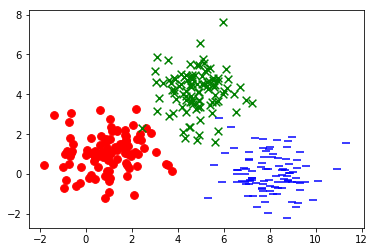

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1_label0 = np.random.normal(1,1, (100,1))
x2_label0 = np.random.normal(1,1, (100,1))
x1_label1 = np.random.normal(5,1, (100,1))
x2_label1 = np.random.normal(4,1, (100,1))
x1_label2 = np.random.normal(8,1, (100,1))
x2_label2 = np.random.normal(0,1, (100,1))

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

# Listing 4.9 Setting up training and test data for multiclass classification
Define the labels and shuffle the data:


In [9]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))

xs = np.vstack((xs_label0, xs_label1, xs_label2))
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

In [10]:
test_x1_label0 = np.random.normal(1,1,(10,1))
test_x2_label0 = np.random.normal(1,1,(10,1))
test_x1_label1 = np.random.normal(5,1,(10,1))
test_x2_label1 = np.random.normal(4,1,(10,1))
test_x1_label2 = np.random.normal(8,1,(10,1))
test_x2_label2 = np.random.normal(0,1,(10,1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))


test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0]] * 10 + [[0.,1.,0]]*10+[[0.,0.,1.]]*10)

In [11]:
train_size, num_features = xs.shape

# Listing 4.10 Using softmax regression


In [12]:
import tensorflow as tf

learning_rate = 0.01
training_epochs = 1000

num_labels = 3
batch_size = 100

X = tf.placeholder(tf.float32, shape=[None, num_features])
Y = tf.placeholder(tf.float32, shape=[None, num_labels])

W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Listing 4.11 Executing the graph


In [14]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for step in range(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        print(step, err)
        
    w_val = sess.run(W)
    print('W', w_val)
    b_val = sess.run(b)
    print('B', b_val)
    print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))

0 109.861
1 129.574
2 114.352
3 627.96
4 75.1609
5 116.132
6 210.343
7 122.261
8 45.3692
9 32.9852
10 29.9901
11 18.1685
12 18.5081
13 20.4976
14 14.7446
15 16.2759
16 18.3823
17 13.0769
18 14.3838
19 16.6383
20 11.6313
21 13.0411
22 15.3675
23 10.5911
24 11.8683
25 14.2993
26 9.76572
27 10.905
28 13.4208
29 9.1051
30 10.0785
31 12.6855
32 8.56374
33 9.36511
34 12.0651
35 8.11035
36 8.74406
37 11.5364
38 7.72341
39 8.20062
40 11.0814
41 7.38804
42 7.72329
43 10.686
44 7.09375
45 7.30264
46 10.3391
47 6.83291
48 6.93069
49 10.0318
50 6.59976
51 6.60061
52 9.75742
53 6.38982
54 6.30651
55 9.51042
56 6.19955
57 6.04336
58 9.28645
59 6.02607
60 5.80686
61 9.08202
62 5.86705
63 5.59336
64 8.89429
65 5.72054
66 5.39977
67 8.72096
68 5.58495
69 5.22346
70 8.56011
71 5.45894
72 5.06222
73 8.4102
74 5.34137
75 4.91416
76 8.2699
77 5.23129
78 4.77769
79 8.13812
80 5.1279
81 4.65143
82 8.01394
83 5.0305
84 4.53423
85 7.89659
86 4.9385
87 4.42508
88 7.78539
89 4.8514
90 4.32312
91 7.67975
92 4.768

1032 1.07393
1033 2.9244
1034 1.32637
1035 1.07247
1036 2.92089
1037 1.32435
1038 1.07102
1039 2.9174
1040 1.32234
1041 1.06958
1042 2.91392
1043 1.32035
1044 1.06814
1045 2.91045
1046 1.31836
1047 1.0667
1048 2.90699
1049 1.31638
1050 1.06528
1051 2.90355
1052 1.3144
1053 1.06386
1054 2.90012
1055 1.31244
1056 1.06245
1057 2.8967
1058 1.31049
1059 1.06104
1060 2.8933
1061 1.30854
1062 1.05964
1063 2.8899
1064 1.3066
1065 1.05825
1066 2.88652
1067 1.30467
1068 1.05686
1069 2.88315
1070 1.30275
1071 1.05548
1072 2.8798
1073 1.30084
1074 1.0541
1075 2.87645
1076 1.29894
1077 1.05274
1078 2.87312
1079 1.29704
1080 1.05137
1081 2.8698
1082 1.29516
1083 1.05002
1084 2.86648
1085 1.29328
1086 1.04867
1087 2.86318
1088 1.29141
1089 1.04732
1090 2.8599
1091 1.28955
1092 1.04599
1093 2.85662
1094 1.28769
1095 1.04465
1096 2.85336
1097 1.28585
1098 1.04333
1099 2.8501
1100 1.28401
1101 1.04201
1102 2.84686
1103 1.28218
1104 1.04069
1105 2.84363
1106 1.28035
1107 1.03938
1108 2.84041
1109 1.27854

1981 2.19771
1982 0.946656
1983 0.798639
1984 2.19615
1985 0.945922
1986 0.798096
1987 2.19459
1988 0.945189
1989 0.797556
1990 2.19303
1991 0.944458
1992 0.797016
1993 2.19148
1994 0.94373
1995 0.796478
1996 2.18992
1997 0.943002
1998 0.795941
1999 2.18837
2000 0.942275
2001 0.795404
2002 2.18683
2003 0.941551
2004 0.794869
2005 2.18528
2006 0.940828
2007 0.794336
2008 2.18374
2009 0.940107
2010 0.793802
2011 2.1822
2012 0.939388
2013 0.793272
2014 2.18067
2015 0.938669
2016 0.792741
2017 2.17914
2018 0.937952
2019 0.792211
2020 2.17761
2021 0.937239
2022 0.791683
2023 2.17608
2024 0.936526
2025 0.791156
2026 2.17456
2027 0.935815
2028 0.790629
2029 2.17303
2030 0.935104
2031 0.790104
2032 2.17152
2033 0.934396
2034 0.78958
2035 2.17
2036 0.933689
2037 0.789057
2038 2.16849
2039 0.932985
2040 0.788534
2041 2.16698
2042 0.932282
2043 0.788014
2044 2.16547
2045 0.931579
2046 0.787495
2047 2.16396
2048 0.930879
2049 0.786976
2050 2.16246
2051 0.93018
2052 0.786458
2053 2.16096
2054 0.929

2730 0.690384
2731 1.8775
2732 0.802778
2733 0.69003
2734 1.87645
2735 0.802323
2736 0.689679
2737 1.87539
2738 0.80187
2739 0.689326
2740 1.87434
2741 0.801417
2742 0.688975
2743 1.87329
2744 0.800964
2745 0.688624
2746 1.87224
2747 0.800513
2748 0.688273
2749 1.87119
2750 0.800062
2751 0.687924
2752 1.87015
2753 0.799613
2754 0.687575
2755 1.8691
2756 0.799164
2757 0.687226
2758 1.86806
2759 0.798716
2760 0.686879
2761 1.86701
2762 0.798266
2763 0.68653
2764 1.86597
2765 0.797819
2766 0.686182
2767 1.86493
2768 0.797372
2769 0.685836
2770 1.8639
2771 0.796927
2772 0.685489
2773 1.86286
2774 0.796483
2775 0.685143
2776 1.86182
2777 0.796038
2778 0.684797
2779 1.86079
2780 0.795594
2781 0.684452
2782 1.85976
2783 0.795151
2784 0.684108
2785 1.85873
2786 0.794708
2787 0.683764
2788 1.8577
2789 0.794267
2790 0.683421
2791 1.85667
2792 0.793827
2793 0.683078
2794 1.85564
2795 0.793386
2796 0.682734
2797 1.85461
2798 0.792946
2799 0.682393
2800 1.85359
2801 0.792508
2802 0.682051
2803 1.85